In [1]:
import numpy as np
import matplotlib.pyplot as plt

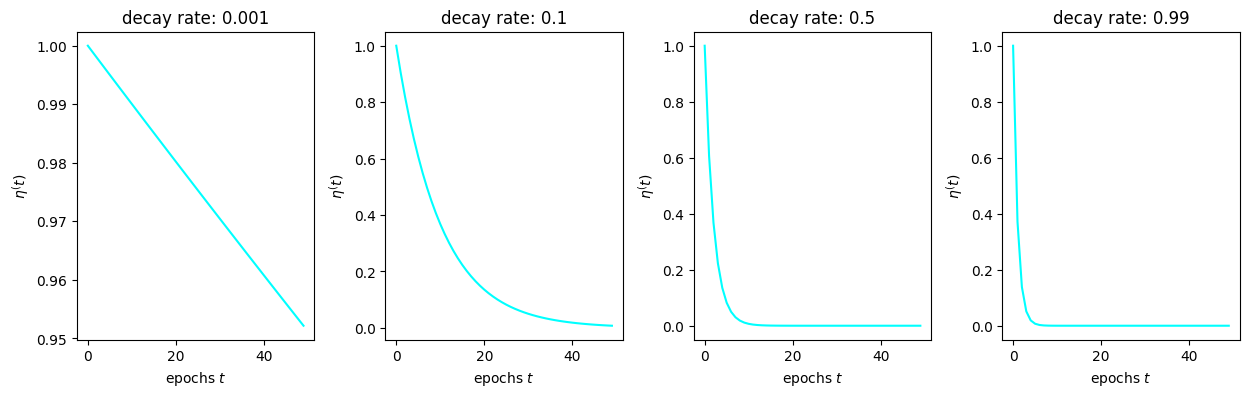

In [2]:
epochs = np.arange(0, 50)
lr_decay = [0.001, 0.1, 0.5, 0.99]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for decay, ind in zip(lr_decay, plt_ind):
    plt.subplot(ind)
    learn_rate = np.exp(-epochs * decay)
    plt.plot(epochs, learn_rate, c='cyan')
    plt.title('decay rate: ' + str(decay))
    plt.xlabel('epochs $t$')
    plt.ylabel('$\eta^(t)$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

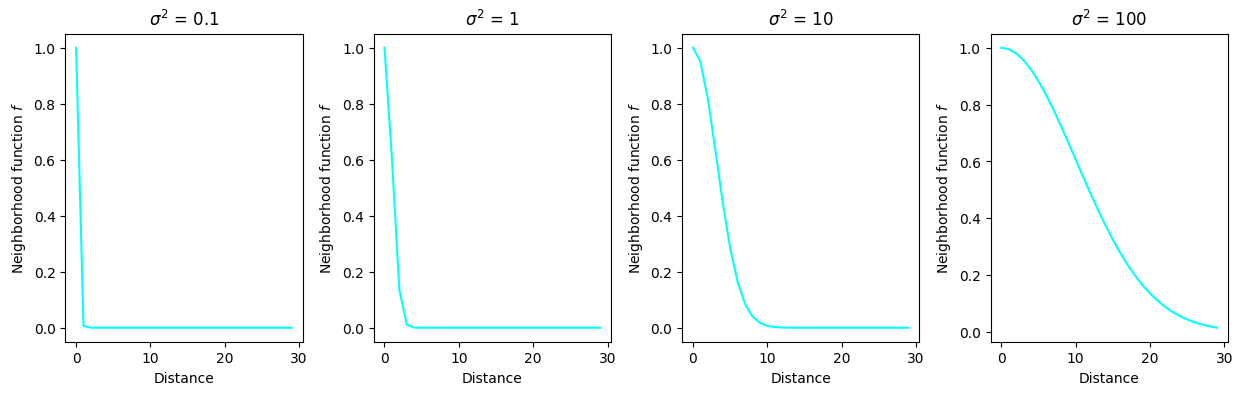

In [3]:
distance = np.arange(0, 30)
sigma_sq = [0.1, 1, 10, 100]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for s, ind in zip(sigma_sq, plt_ind):
    plt.subplot(ind)
    f = np.exp(-distance ** 2 / 2 / s)
    plt.plot(distance, f, c='cyan')
    plt.title('$\sigma^2$ = ' + str(s))
    plt.xlabel('Distance')
    plt.ylabel('Neighborhood function $f$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [4]:
from somJ.som  import SoM
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Number of training examples
n_x = 300000
# Initialize the training data
rand = np.random.RandomState(0)
train_data = rand.randint(0, 255, (n_x, 3))

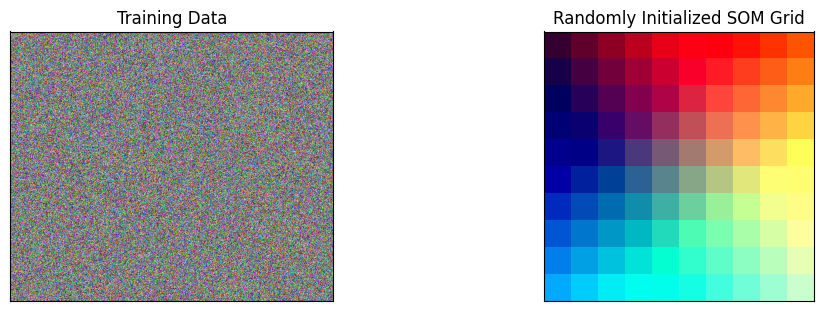

In [6]:
som = SoM(method="pca",data=train_data)
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(500, 600, 3))
ax[0].title.set_text('Training Data')
filas, columnas, n_features = som.som_map.shape
som_map_2d = som.som_map.reshape(-1, n_features)
som_map_inversed = som.scaler.inverse_transform(som_map_2d)
scaled= som_map_inversed.reshape(filas, columnas, n_features)
ax[1].imshow(scaled.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')

Entrenando SOM: 100%|██████████████████████| 10/10 [01:35<00:00,  9.52s/it, lr=0.0407, radius=0.638]


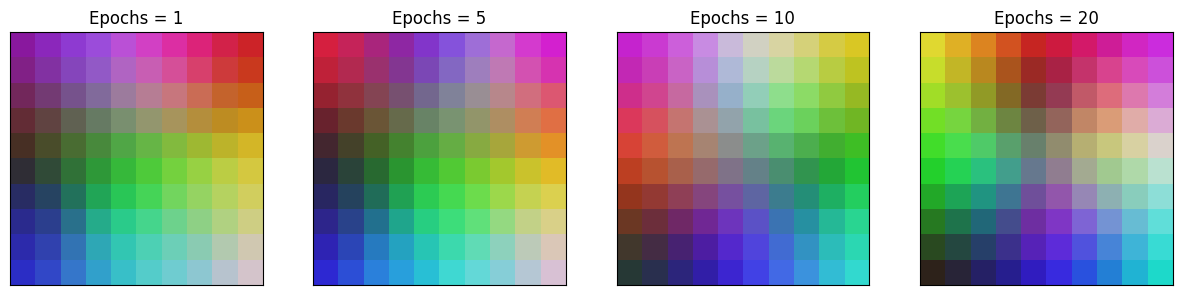

In [7]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4,5,10], range(0,4)):
    total_epochs += epochs
    som.train(train_data, epochs=epochs,prog_bar=True)
    map =som.som_map
    ax[i].imshow(map.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

In [8]:
# Initialize the SOM randomly
som = SoM(method="pca",data=train_data)

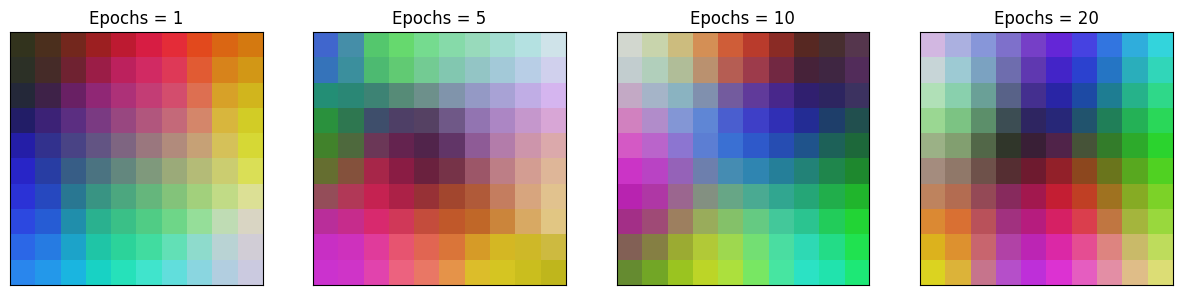

In [9]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4,5,10], range(0,4)):
    total_epochs += epochs
    som.train(train_data, epochs=epochs,update='batchmap',batch_size=10000)
    map =som.som_map
    ax[i].imshow(map.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

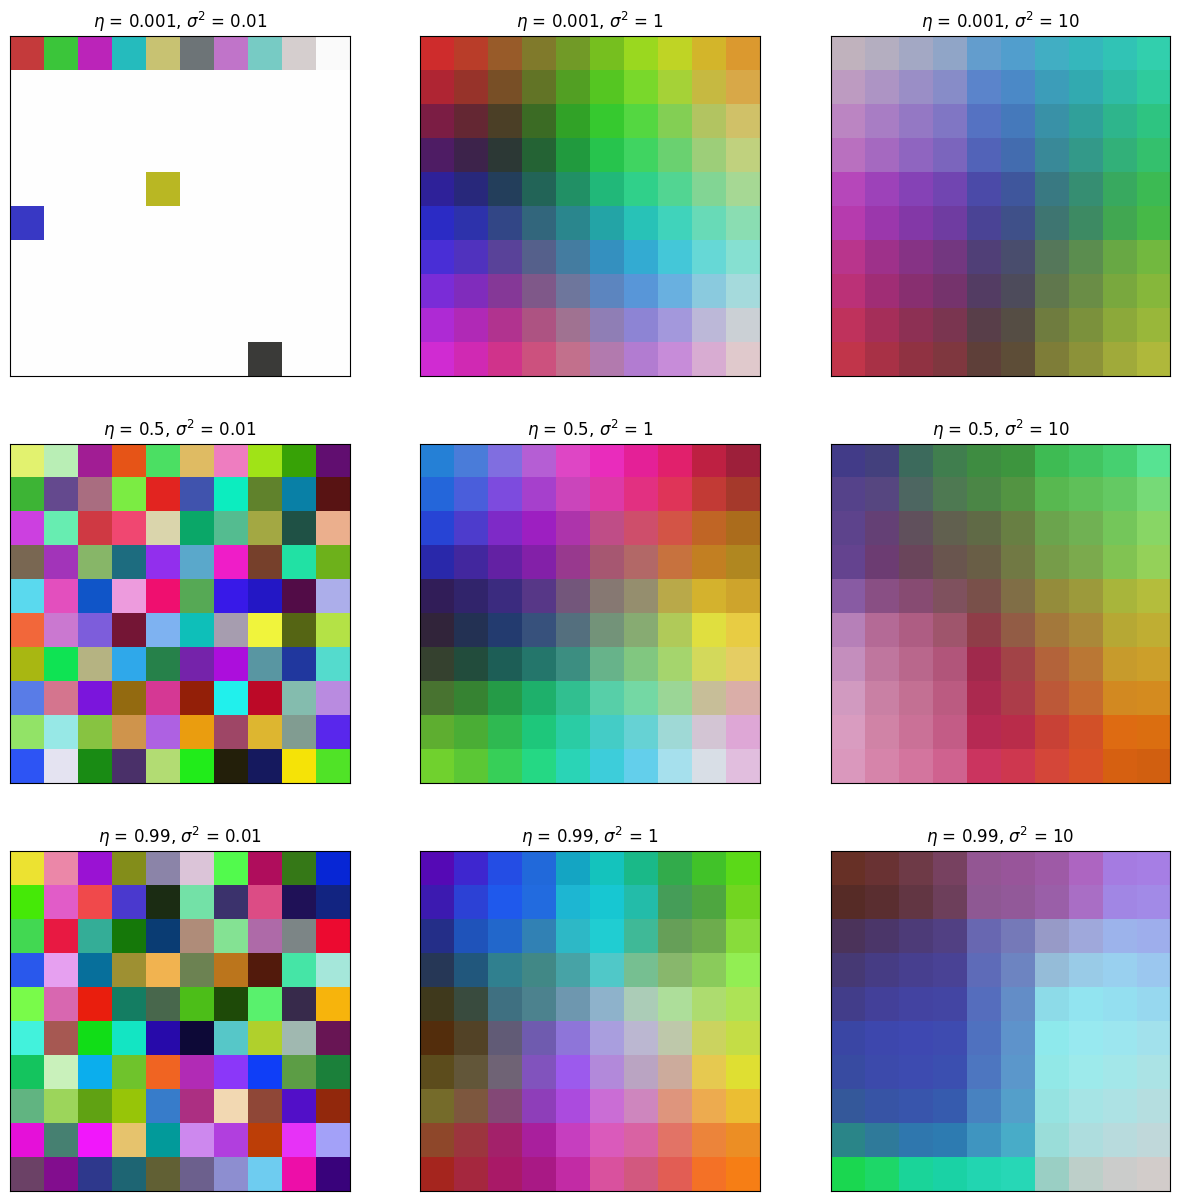

In [10]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Initialize the SOM randomly to the same state

for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        som.som_map = som.rand.randint(0, 255, (10, 10, 3)).astype(float)        
        som.train(train_data, epochs = 5,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        res =som.som_map
        ax[i][j].imshow(res.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))

In [11]:
# import matplotlib.animation as animation
# from som  import SoM
# import numpy as np
# import matplotlib.pyplot as plt

# # Dimensions of the SOM grid
# m = 10
# n = 10
# # Number of training examples
# n_x = 300000
# # Initialize the training data
# rand = np.random.RandomState(0)
# train_data = rand.randint(0, 255, (n_x, 3))
# fig, ax = plt.subplots()
# # Initialize the SOM randomly
# som = SoM(method="pca",input_dim=3,data=train_data)
# map = som.train(train_data, epochs=1,update='batch',batch_size=10000,save=True)

# map_history = np.load('som_map_history.npy')
# def update(frame):
#     ax.clear()
#     # Mostrar la imagen. Asegúrate de que los valores estén en el rango [0,1]
#     ax.imshow(map_history[frame])
#     ax.set_title(f"Batch{frame}")
#     ax.axis("off")

# ani = animation.FuncAnimation(fig, update, frames=len(map_history), interval=500)

# # Opcional: guardar la animación en un archivo GIF (asegúrate de tener 'imagemagick' o 'pillow' instalado)
# ani.save('som_batch_animation.gif', writer='imagemagick', fps=5)
# ax.imshow(map_history[0])

In [12]:
# import matplotlib.animation as animation
# from som  import SoM
# import numpy as np
# import matplotlib.pyplot as plt

# n_x = 300000
# # Initialize the training data
# rand = np.random.RandomState(0)
# train_data = rand.randint(0, 255, (n_x, 3))
# # 1) Define cuántas muestras verdes quieres
# n_green = 10_000

# # 2) Crea un array de forma (n_green, 3) con valor [0,255,0]
# green = np.array([0, 255, 0], dtype=np.uint8)
# green_samples = np.tile(green, (n_green, 1))  # repite la fila green n_green veces

# # 3) Concatena al final de train_data
# train_data_augmented = np.vstack([train_data, green_samples])
# fig, ax = plt.subplots()
# # Initialize the SOM randomly
# som = SoM(method="pca",input_dim=3,data=train_data)
# map = som.train(train_data_augmented, epochs=1,update='batch',batch_size=10000,save=True)

# map_history = np.load('som_map_history.npy')
# def update(frame):
#     ax.clear()
#     # Mostrar la imagen. Asegúrate de que los valores estén en el rango [0,1]
#     ax.imshow(map_history[frame])
#     ax.set_title(f"Batch{frame}")
#     ax.axis("off")

# ani = animation.FuncAnimation(fig, update, frames=len(map_history), interval=500)

# # Opcional: guardar la animación en un archivo GIF (asegúrate de tener 'imagemagick' o 'pillow' instalado)
# ani.save('som_green.gif', writer='imagemagick', fps=5)
# ax.imshow(map_history[0])